#⭐캐글 대회 부셔버리기!

####⭐캐글이란?
####인공지능을 접하는 사람들이라면 한번씩 들어봤다고 생각합니다.
####캐글은 2010년 설립된 **예측모델 및 분석 대회 플랫폼**이며, 기업 및 단체에서
####데이터와 해결과제를 등록하면, **데이터 과학자들이 이를 해결하는 모델을 개발하고 경쟁**합니다.
####일반인도 물론 **참여가능**하구요
####이번 프로젝트는 이곳에 **직접 만든 모델을 한번 제출**해보겠습니다.
####**집 값 예측 대회이므로 분류 모델을 사용**할것입니다.
####하지만 이번대회는 규칙을 읽어보니
####이번 대회의 평가 방식은 **Root Mean Squared Error** 입니다.
####이렇게 나와있네요
####평가방식을 숙지하고 시작합니다.
#⭐달성 목표
☝파라미터 튜닝으로 최적의 파라미터 찾기

☝점수 110000 이하로 나오기

☝앙상블 사용해보기
#⭐발전과제
☝점수 90000 이하로 출력

#⭐구글 드라이브 임포트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#필요한 라이브러리들을 임포트 시킵니다.
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

#⭐구글 드라이브 경로에서 데이터 가지고 오기

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/pic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/pic/test.csv')

####2019 2nd ML month with KaKR이라고 하는 대회인거 같습니다.
####데이터 정보는 다음과 같습니다.
####ID : 집을 구분하는 번호
####date : 집을 구매한 날짜
####price : 집의 가격(Target variable)
####bedrooms : 침실의 수
####bathrooms : 화장실의 수
####sqft_living : 주거 공간의 평방 피트(면적)
####sqft_lot : 부지의 평방 피트(면적)
####floors : 집의 층 수
####waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
####view : 집이 얼마나 좋아 보이는지의 정도
####condition : 집의 전반적인 상태
####grade : King County grading 시스템 기준으로 매긴 집의 등급
####sqft_above : 지하실을 제외한 평방 피트(면적)
####sqft_basement : 지하실의 평방 피트(면적)
####yr_built : 지어진 년도
####yr_renovated : 집을 재건축한 년도
####zipcode : 우편번호
####lat : 위도
####long : 경도
####sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
####sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

In [ ]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

####학습 데이터를 불러오니 위에 설명한 컬럼들이 들어있는걸 확인하실 수 있습니다.
####근데 뭔가 이상합니다
####왜 화장실의 수가 소수점으로 나타날까요?
####답은 **문화 차이**인거 같습니다.
####**미국에서는 저런 식으로 표시**한다고 합니다
####**0.5 : 세면대**
####**0.75 : 세면대, 화장실, 샤워실** 등으로 말입니다

In [ ]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


####하지만 테스트 데이터는 좀 다릅니다.
####price가 빠져있습니다.
####이번 대회는 **집값을 예측하는 대회이기 때문에 테스트 데이터에서 집값은 빠져**있습니다.

In [ ]:
train['date'] = train['date'].apply(lambda x: x[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [ ]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

####데이터를 살펴보면 **20141209T000000** 이렇게 되어있는걸 보실 수 있습니다.
####**시간이나 요일은 없어도 될꺼 같습니다**.
####**월까지만 정수형으로 표현하게 전처리를 하겠습니다**.

In [ ]:
y = train['price']

del train['price']
del train['id']

####집 값 예측 문제이므로 y에 가격을 넣어주고
####학습 데이터에서 필요없는 **컬럼[price, id(연관성 없음)]은 삭제**해줍니다.

In [ ]:
print(y)

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64


####y를 확인해보니 price값이 잘 담겨진걸 확인하실수 있습니다.

---

#⭐결측지 확인 및 제거

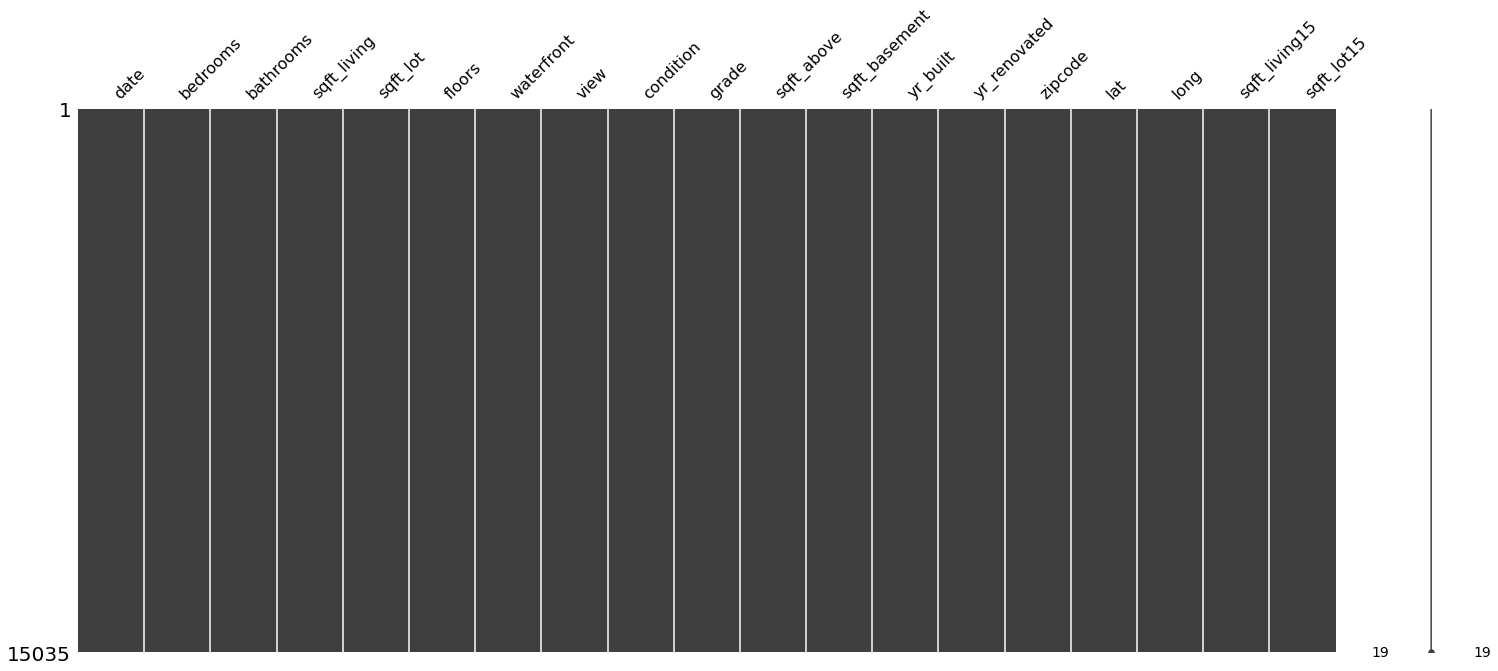

In [ ]:
msno.matrix(train)

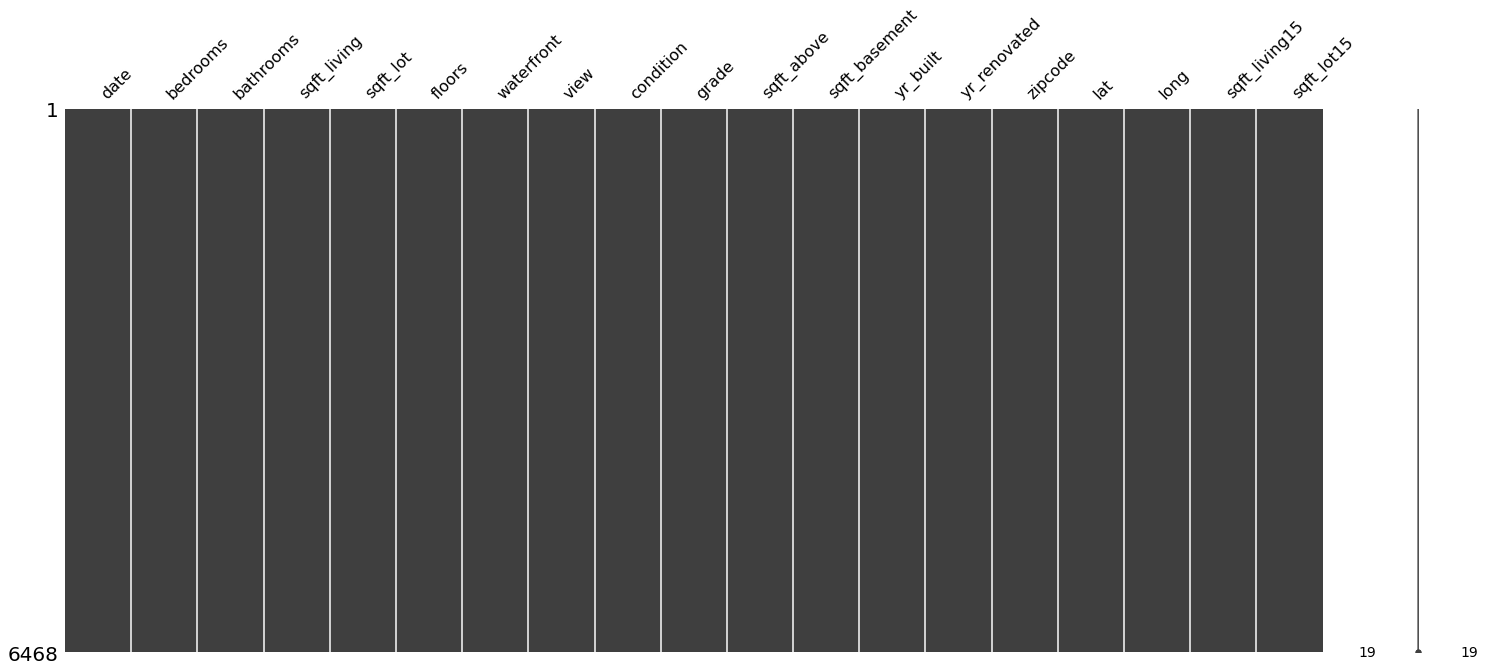

In [ ]:
msno.matrix(test)

####위에서 어느정도 처리를 하고 결측치를 확인해서 인지 결측치는 없어보이지만 그래도 더 자세하게 확인하겠습니다.

In [ ]:
train.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
test.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

####**isna().sum()을 사용할 경우 결측치가 있으면 1, 없으면 0으로 표시**됩니다.
####그리고 sum함수로 인해 다 더해지게 되는데 현재출력을 봐선 결측치는 없는거 같습니다.

In [ ]:
train_len = len(train)
data = pd.concat((train, test), axis=0)

In [ ]:
len(data)

21503

####한가지하고 진행하는것을 까먹었습니다.
####**보통 전처리를 진행할때 학습따로 테스트 따로하면 번거로우니 같이하는게 좋습니다**.
####아직 값 조정이 더 남아있으니 지금이라도 **합쳐서 진행**하겠습니다.

---

#⭐값 분포 확인

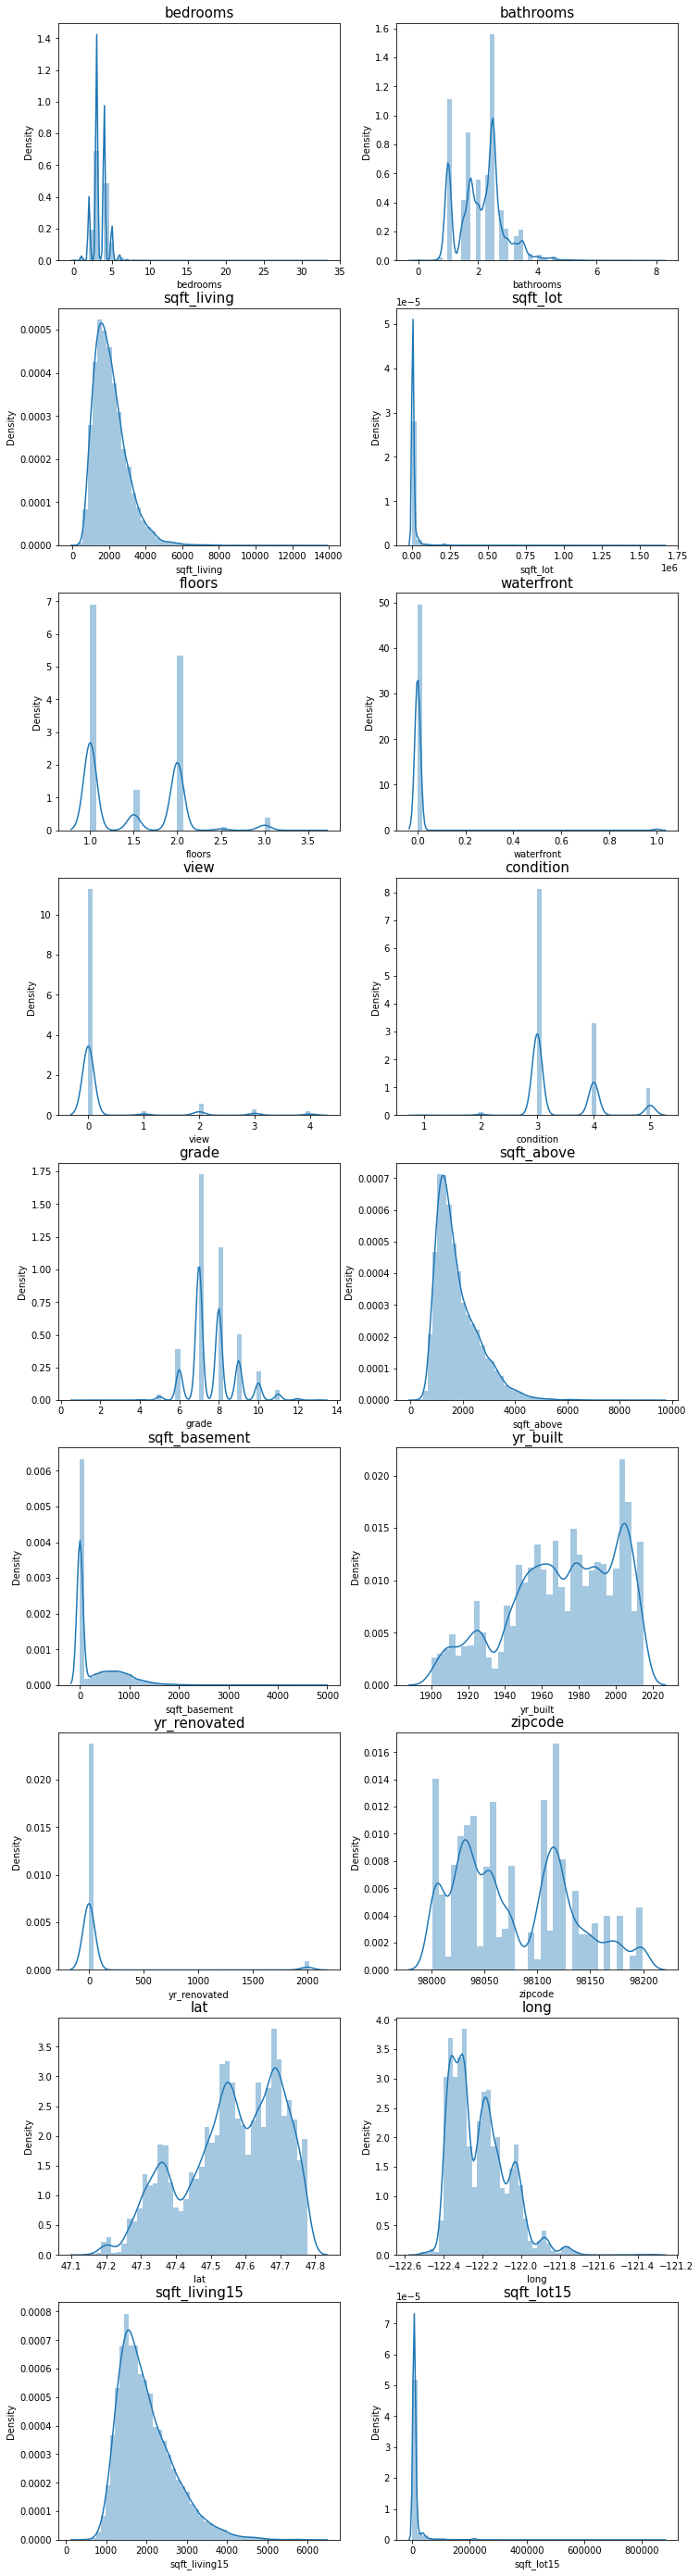

In [ ]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   

count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.distplot(data[columns[count]], ax = ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

####뭔가 이상한걸 느끼셨습니까?
####데이터가 너무 한곳으로만 몰린거 같아보이시죠?
####해결하겠습니다.

In [ ]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

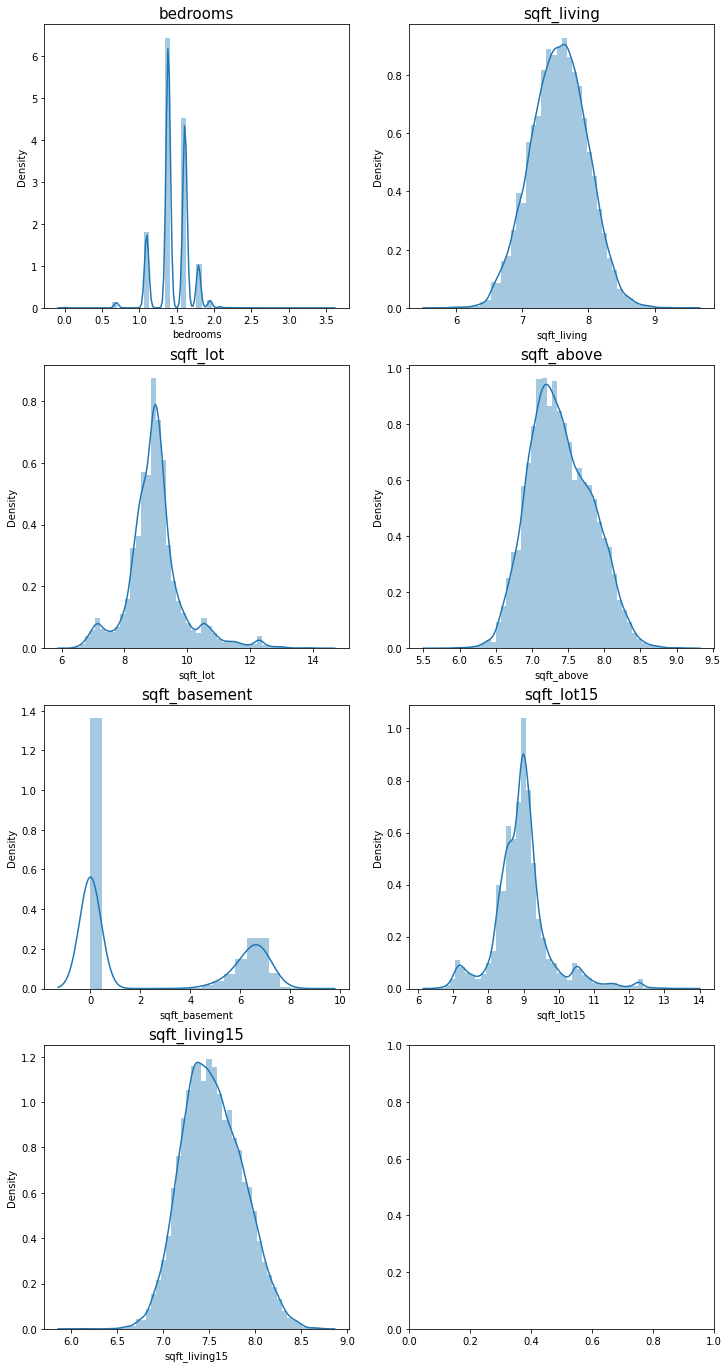

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))   

count = 0
for row in range(4):
    for col in range(2):
        if count == 7 :
            break
        sns.distplot(data[skew_columns[count]], ax = ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

####저렇게 값이 **한군데에 몰린 경우에는 log함수를 이용**하여 고르게 펴줄 수 있습니다.
####즉 값들에 **상관관계가 높을때**, **값에 왜곡이 있거나 한 곳에 몰려있게되면 모델 성능을 저하**시킬 수 있습니다.
####이럴경우는 위에 말한거처럼 **log함수를 이용하여 값을 고르게 만들어 줍니다**.
####실제로 적용한 모습을 보니 어떤가요?
####조금이지만 괜찮아졌지 않나요?

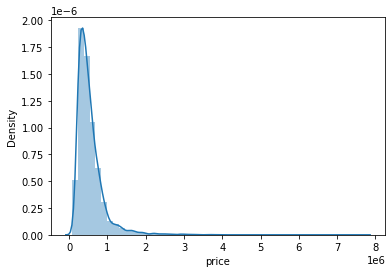

In [ ]:
sns.distplot(y)
plt.show()

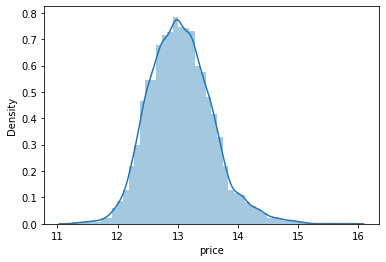

In [ ]:
y_log = np.log1p(y)

sns.distplot(y_log)
plt.show()

####y값도 생각보다 한쪽으로만 몰려있어 이 역시 log함수를 이용해 펴주도록 합시다.

In [ ]:
y = np.log1p(y)
print(y)

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64


####이상없이 변화한 값이 잘 들어간거 같습니다.



In [ ]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


####다시 데이터를 분리시켜줍니다.
####**분리시켜주는 이유는 이제 모델을 학습시킬것이기 때문**입니다.

---

#⭐모델학습 및 결과 제출

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

####이번에 사용할 분류 모델들을 임포트 시킵니다.
####오차를 계산할 함수도 만들어 줍니다.
####함수를 보시면 **expm1이라고 있는데 저것은 y값을 로그화 시켜**버렸으니
####그상태로 출력하면 값이 이상하게 나오기때문에 **예측시에는 다시 원래대로 바꿔서 값이 이상해지지 않게 해주는 것**입니다.

In [ ]:
def get_scores(models, train, y):
    df = {}
    
    for model in models :
    
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE',ascending=False)
        
    return score_df

####오차율을 계산해주는 함수도 만들어줍니다.

In [ ]:
random_state = 2020    

xgboost = XGBRegressor(learning_rate= 0.1, max_depth = 6, n_estimators = 500, random_state = random_state)
lightgbm = LGBMRegressor(max_depth = 20, n_estimators=300, random_state=random_state)
gboost = GradientBoostingRegressor(learning_rate = 1.0, max_depth = 5, max_features = 0.6, n_estimators = 500, random_state = random_state)
random = RandomForestRegressor(max_depth = 5, max_features = 1.0, n_estimators = 100, random_state = random_state)

models = [gboost, xgboost, lightgbm, random]

####원래는 그리드 서치를 사용하여 최적을 파라미터를 구해야합니다.
####하지만 저는 쓰지 않고 직접 캐글에서 최적 조건을 찾아서 사용하겠습니다.
####**그리드 서치를 사용하지 않는 이유는 간단**합니다.
####**이번모델이 지금 한번으로 통과되지 않을수도 있는데 그때마다 그리드 서치를 이용하게 되면,**
####**너무 많은 시간을 소요**하게 됩니다.
####모델 각각 최적을 파라미터를 찾았고 그 값을 입력해줍니다.

In [ ]:
get_scores(models, x, y)

[13:43:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,RMSE
GradientBoostingRegressor,187945.670142
RandomForestRegressor,173382.558817
LGBMRegressor,109307.968720
XGBRegressor,107205.981493


In [ ]:
model = LGBMRegressor(max_depth = 20, n_estimators=300, random_state=random_state)
model.fit(x, y)
prediction = model.predict(sub)
prediction

array([13.12160458, 13.10226918, 14.15043868, ..., 13.05037436,
       12.67158278, 13.01735592])

####뭔가 값이 이상합니다.
####**로그함수 처리한걸 안바꾸어주었습니다**.
####expm1을 써서 바꾸어 주도록 합시다.

In [ ]:
prediction = np.expm1(prediction)
prediction

array([ 499619.74521686,  490052.17258291, 1397838.90879818, ...,
        465269.55869982,  318564.30877008,  450157.90324192])

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/pic/sample_submission.csv')
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [ ]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,4.996197e+05
1,15036,4.900522e+05
2,15037,1.397839e+06
3,15038,3.072446e+05
4,15039,3.279127e+05


In [ ]:
submission.to_csv('submission1.csv', index=False)

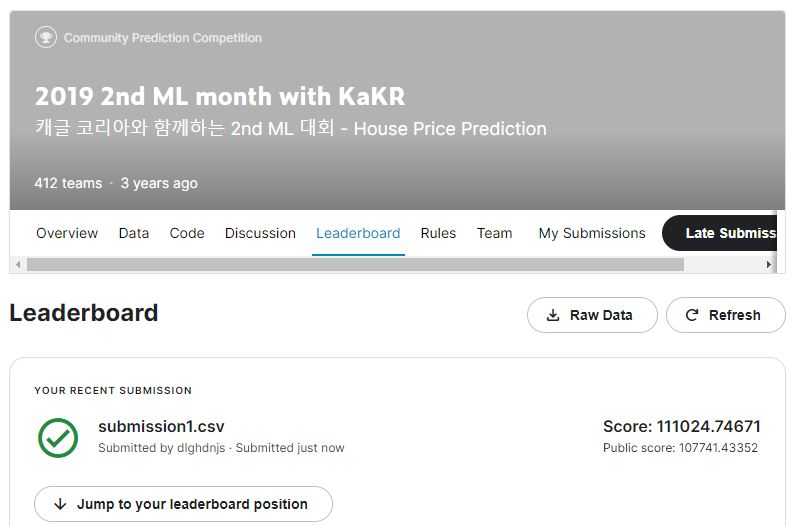

####오류가 두번째로 낮은 모델을 썻는데 아쉽네요
####그럼 이번에는 모델 오류순위 1~2위를 합쳐 제출해보겠습니다.
####모델을 합치는 방식은 두가지가 있습니다.
####**보팅과 에버리징이 있는데 보팅은 주로 분류모델**에서
####**에버리징은 회귀모델에서 사용**합니다.
####즉 저희는 에버리징을 사용해야합니다.
####에버리징은 간단히 말해 모델을 더해 평균을 낸것입니다.

In [ ]:
model2 = XGBRegressor(learning_rate= 0.1, max_depth = 6, n_estimators = 500, random_state=random_state)
model2.fit(x, y)

[13:44:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=6, n_estimators=500, random_state=2020)

In [ ]:
prediction1 = model2.predict(sub)
prediction1

array([13.200894, 12.944156, 14.111321, ..., 13.073161, 12.708693,
       13.040437], dtype=float32)

In [ ]:
prediction1 = np.expm1(prediction1)
prediction1

array([ 540847.44,  418383.3 , 1344215.  , ...,  475993.28,  330608.28,
        460668.78], dtype=float32)

In [ ]:
en1 = np.vstack([prediction, prediction1]).mean(0)

####캐글을 보니 **vstack으로 모델을 합쳐 평균을 내면 그게 에버리징하고 똑같다**고 합니다.
####실제로 저렇게 사용하시더군요
####그럼 여기서도 저렇게 사용해보겠습니다.

In [ ]:
submission['price'] = en1
submission.head()

,id,price
0,15035,5.202336e+05
1,15036,4.542177e+05
2,15037,1.371027e+06
3,15038,3.008359e+05
4,15039,3.280043e+05


In [ ]:
submission.to_csv('submission1.csv', index=False)

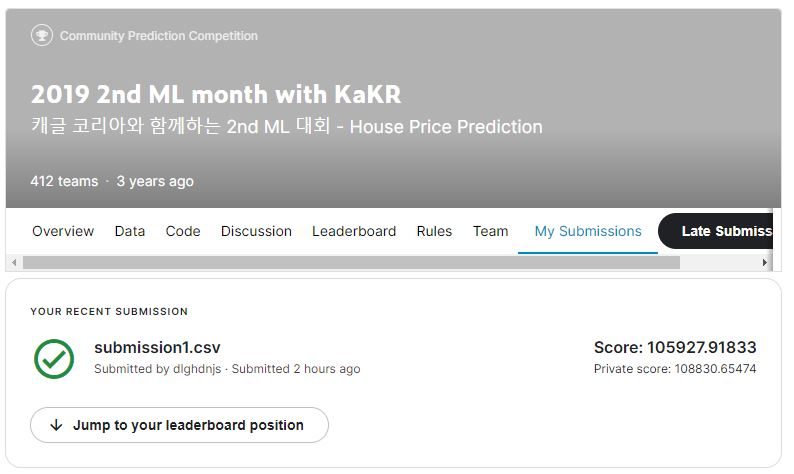

####오! 실제로 합쳐서 냈는데 오차가 줄어들었습니다. 
####현재로써는 루드릭 평가기준에 충족시켰습니다.
####하지만 뭔가 너무 간단하게 끝난거 같지 않습니까?
####한번 전처리를 빡세게 한다음 모델을 만들어 보도록 하겠습니다.

---

#⭐성능이 더 좋은 모델을 만들어보자

In [ ]:
new_train = pd.read_csv('/content/drive/MyDrive/pic/train.csv')
new_test = pd.read_csv('/content/drive/MyDrive/pic/test.csv')

In [ ]:
new_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [ ]:
new_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


####데이터를 불러오는것은 앞에서 한것과 똑같이 하겠습니다.

In [ ]:
print('학습 데이터의 shape : ', new_train.shape)
print('\n 전체 피처의 type \n', new_train.dtypes.value_counts())

학습 데이터의 shape :  (15035, 21)

 전체 피처의 type 
 int64      15
float64     5
object      1
dtype: int64


In [ ]:
print('테스트 데이터의 shape : ', new_test.shape)
print('\n 전체 피처의 type \n', new_test.dtypes.value_counts())

테스트 데이터의 shape :  (6468, 20)

 전체 피처의 type 
 int64      15
float64     4
object      1
dtype: int64


####한번 데이터 타입과 모양을 출력해봤습니다.
####오브젝트가 1개인걸로 봐선 date 같습니다.
####나중에 전처리를 해주겠습니다.

In [ ]:
new_train.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
new_test.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

####위와 똑같이 결측치는 없는것으로 보입니다.

In [ ]:
train_len = len(new_train)
data = pd.concat((new_train, new_test), axis=0)

print(len(data))

21503


####이번에는 미리 데이터를 합쳐 수월하게 진행해보겠습니다.

In [ ]:
data.drop(['id'], axis= 1, inplace = True)

print(data.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


####id는 전에도 말했지만, 연관성이 전혀 없기 때문에 미리 삭제하겠습니다.
####잘 삭제된걸 확인할 수 있습니다.

In [ ]:
data['year'] = data['date'].apply(lambda x : x[:4]).astype(int)
data['month'] = data['date'].apply(lambda x : x[4:6]).astype(int)
data['day'] = data['date'].apply(lambda x : x[6:8]).astype(int)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15


####이번에는 위에서와는 다르게 date에서 year, month, day별로
####새로운 컬럼을 만들어주겠습니다.

In [ ]:
data.drop(['date'], axis= 1, inplace = True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
3,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
4,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15


####잘 만들어진걸 확인한 후 date는 이제 안쓰게 될것이기 때문에 삭제시켜줍니다.

---

#⭐시각화를 멋지게 해보자

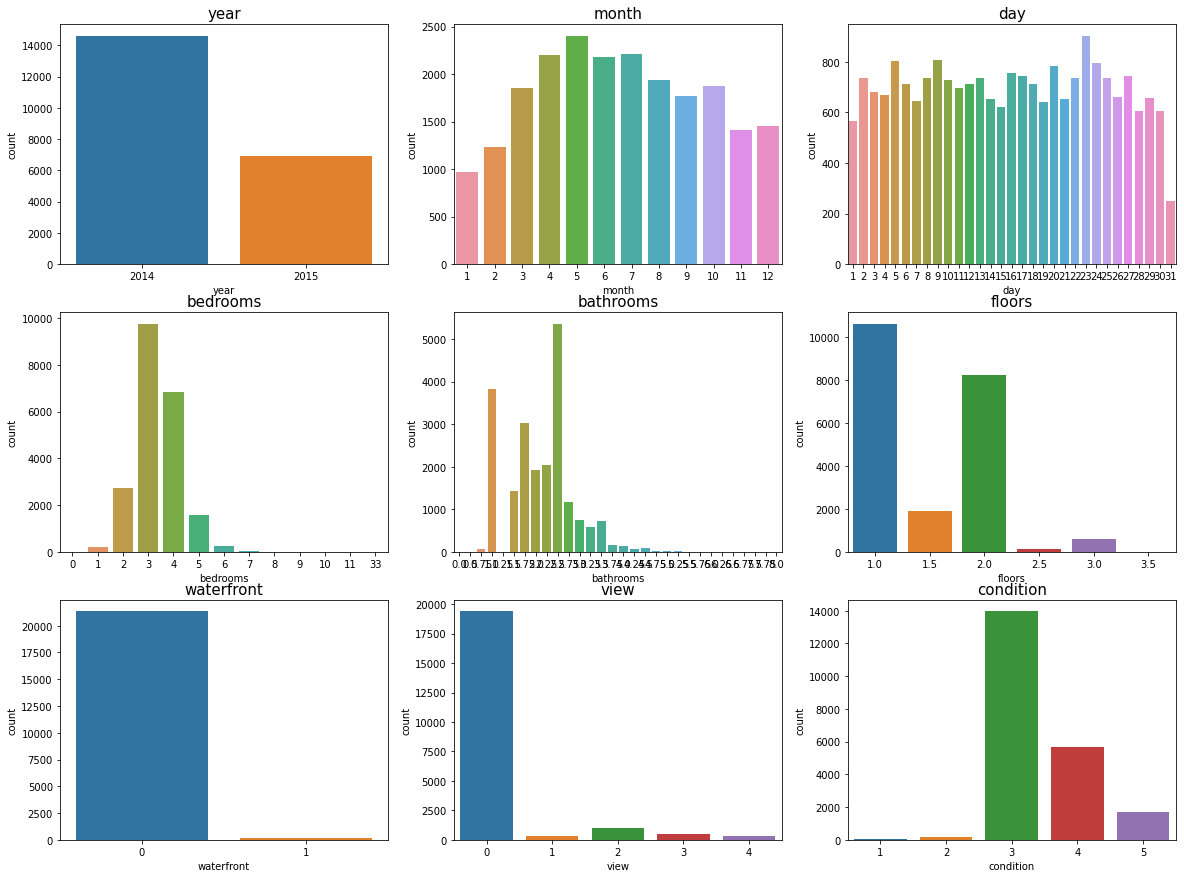

In [ ]:
info = ['year', 'month', 'day', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
        'view', 'condition', 'grade']

fig, ax = plt.subplots(3, 3, figsize=(20, 15))

count = 0
for row in range(3):
    for col in range(3):
        if count == 10:
            break
        sns.countplot(data[info[count]], ax=ax[row][col])
        ax[row][col].set_title(info[count], fontsize=15)
        count += 1

####집 가격하고 연관성이 있다고 생각한 몇몇 컬럼을 시각화 해보았습니다.
####실제로 눈에 뛰는 차이를 보이는 것도 있는 반면, 그렇지 않은것도 존재하는거 같습니다.

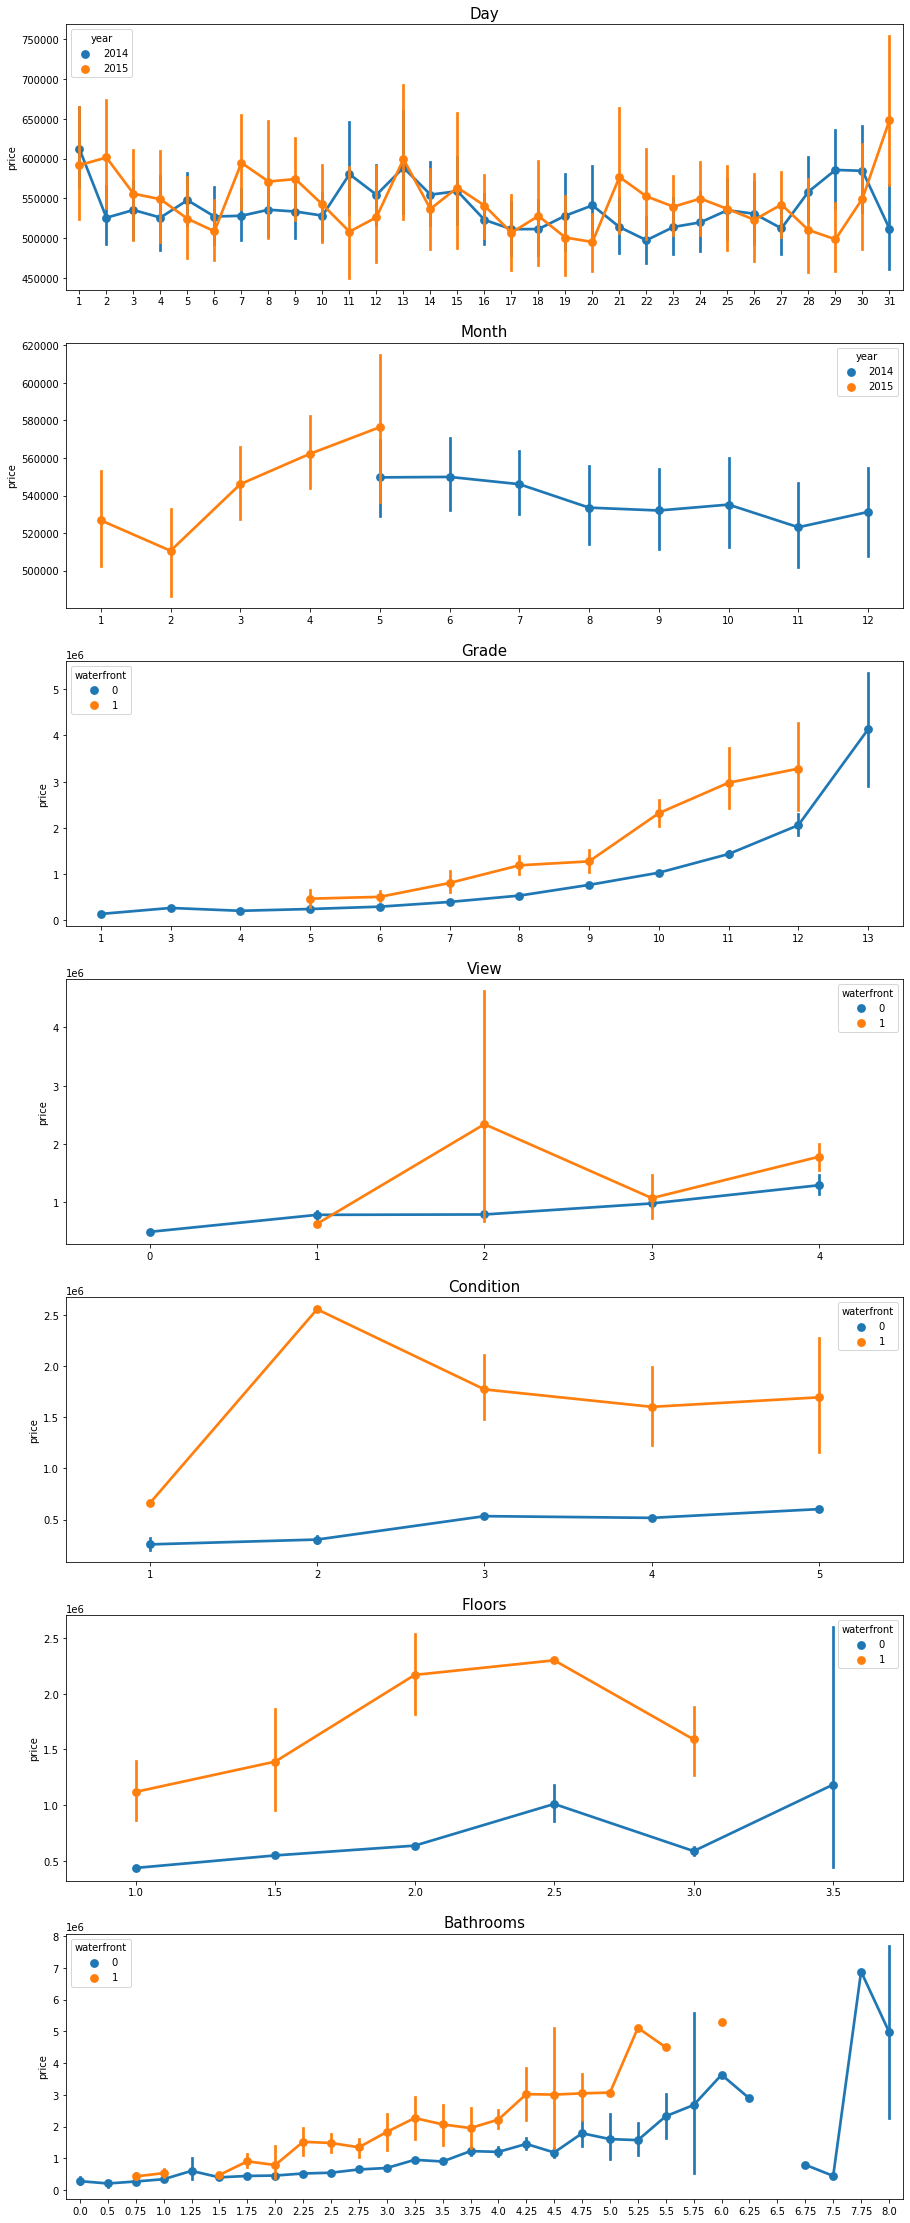

In [ ]:
fig, axes = plt.subplots(7, figsize = (15, 40))

sns.pointplot(data = data, x = 'day', y = 'price', hue = 'year', ax = axes[0])
sns.pointplot(data = data, x = 'month', y = 'price', hue = 'year', ax = axes[1])
sns.pointplot(data = data, x = 'grade', y = 'price', hue = 'waterfront', ax = axes[2])
sns.pointplot(data = data, x = 'view', y = 'price', hue = 'waterfront', ax = axes[3])
sns.pointplot(data = data, x = 'condition', y = 'price', hue = 'waterfront', ax = axes[4])
sns.pointplot(data = data, x = 'floors', y = 'price', hue = 'waterfront', ax = axes[5])
sns.pointplot(data = data, x = 'bathrooms', y = 'price', hue = 'waterfront', ax = axes[6])

title = ['Day', 'Month', 'Grade', 'View', 'Condition', 'Floors', 'Bathrooms']

for i in range(7):
  axes[i].set_xlabel('')
  axes[i].set_title(title[i], fontsize = 15)
plt.show()

####가격과 연관성이 깊다고 생각한걸 pointplot으로 시각화 해보았습니다.
####더 모르겠네요...

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


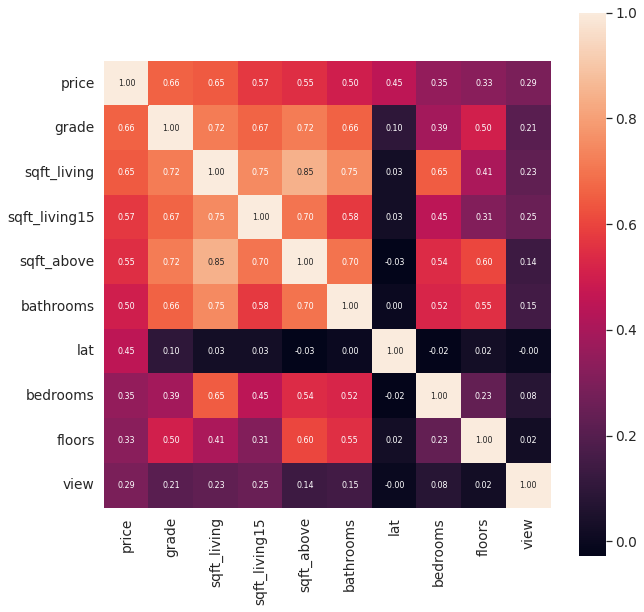

In [ ]:
import scipy as sp

#상관관계를 순위별로 가지고 온다
cor_abs = abs(new_train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='price').index

cor = np.array(sp.stats.spearmanr(new_train[cor_cols].values))[0]
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

####그런데 가만히 생각해보니 저희에게는 상관관계를 보여주는 그래프가 있었습니다.
####히트맵을 쓰면 되는데요
####위에가 실행결과 입니다.


```
(method='spearman')
```
####이 메소드로 인해 가격과 연관성이 높은것이 순서대로 입력됩니다.
####view가 가장 낮군요



In [ ]:
y = new_train['price']

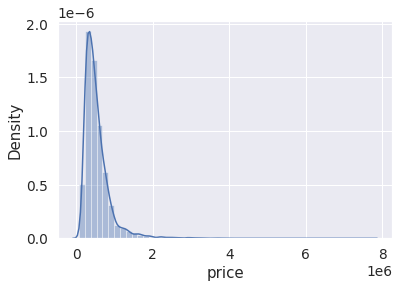

In [ ]:
sns.distplot(y)
plt.show()

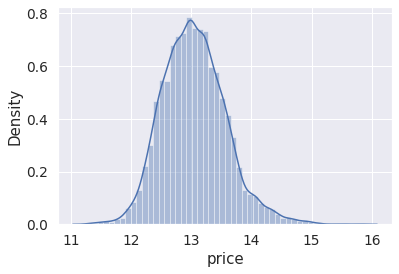

In [ ]:
y_log = np.log1p(y)

sns.distplot(y_log)
plt.show()

In [ ]:
y = np.log1p(y)
print(y)

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64


####y 값을 로그함수를 이용하여 고르게 분포 하도록 합니다.
####train 데이터는 나중에 실행해보겠습니다.

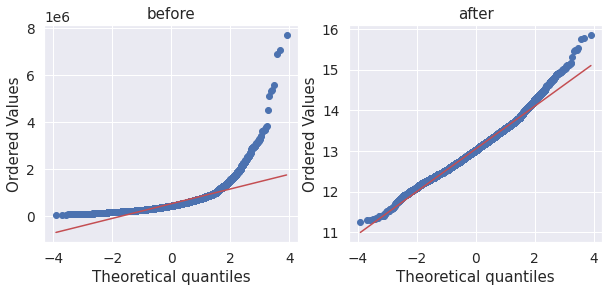

In [ ]:
from scipy import stats

fig, axes = plt.subplots(ncols = 2, figsize = (10, 4))

reg = stats.probplot(new_train['price'], plot = axes[0])
axes[0].set_title('before')

reg = stats.probplot(np.log1p(new_train['price']), plot = axes[1])
axes[1].set_title('after')
plt.show()

####로그함수를 사용하게 된다면, 값이 어떤식으로 고르게 분포되는지 그래프로 표현해봤습니다.

In [ ]:
import folium
from folium import plugins

house_map = folium.Map(location = [new_train['lat'].mean(), new_train['long'].mean()], zoom_start = 10)
lat_long_data = new_train[['lat', 'long']].values.tolist()
h_cluster = folium.plugins.FastMarkerCluster(lat_long_data).add_to(house_map)

house_map

####깃허브에서 코드 실행된것이 보이지 않아 캡처본으로 남깁니다.

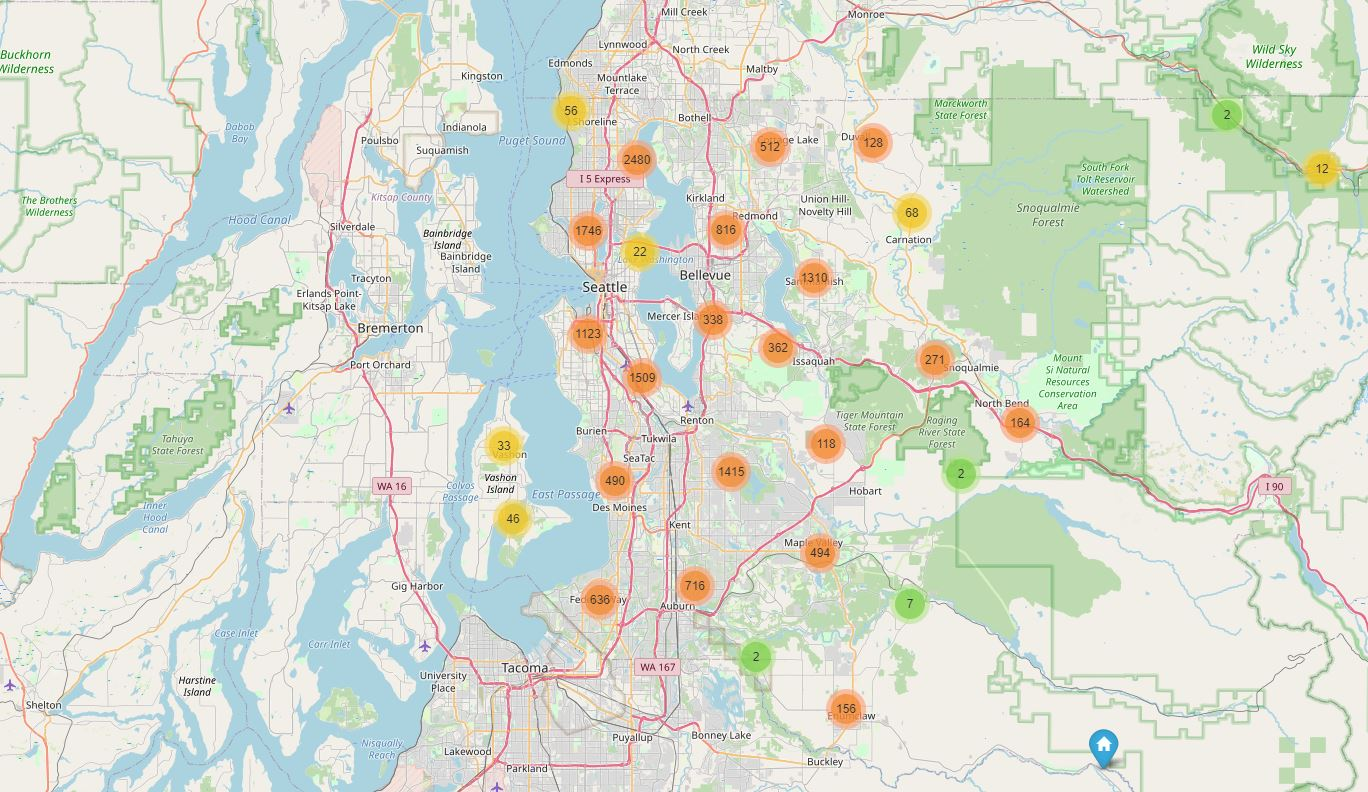

####위에서 히트맵을 사용하여 상관관계를 살펴보았을때 뭔가 이상한 점이 있지 않았습니까?
####**위도, 경도가 가격하고 연관성이 상당히 깊어보였습니다**.
####그래서 지도 시각화 도구중 하나인 **folium을 사용**하니
####저렇게 나오게 되었습니다.
####즉 시애틀 주변 집값을 보여주는데 시애틀이 가격하고 연관성이 높은거 같습니다.

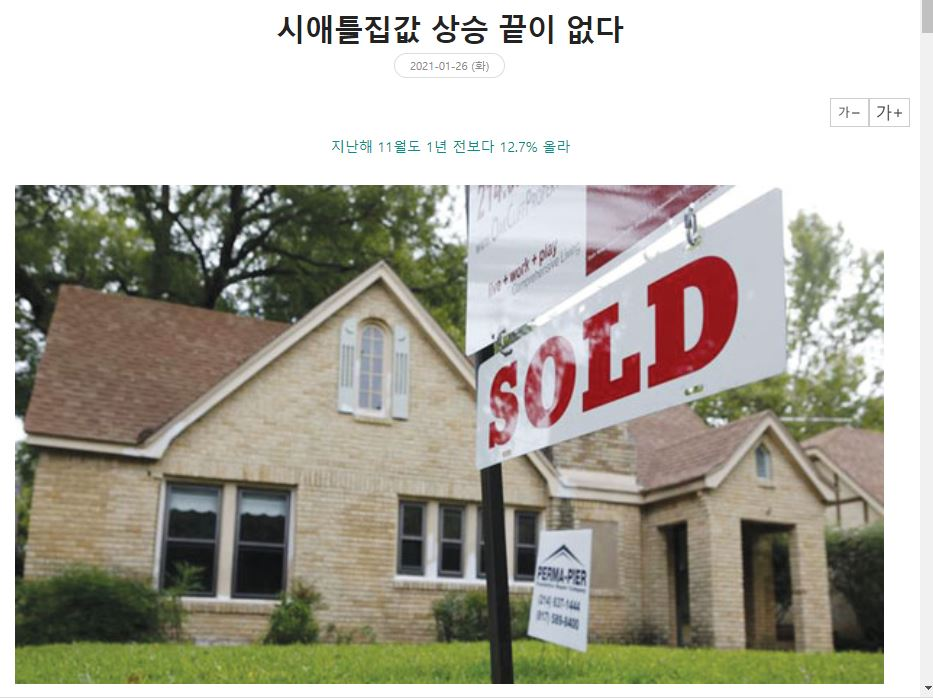

####네 맞는거 같습니다.
####이래서 위도, 경도와 연관성이 깊다고 생각됩니다.

In [ ]:
house_heatmap = folium.Map(location = [new_train['lat'].mean(), new_train['long'].mean()], zoom_start = 9)
house_heatmap.add_children(plugins.HeatMap([[row['lat'], row['long']] for name, row in new_train.iterrows()]))
house_heatmap

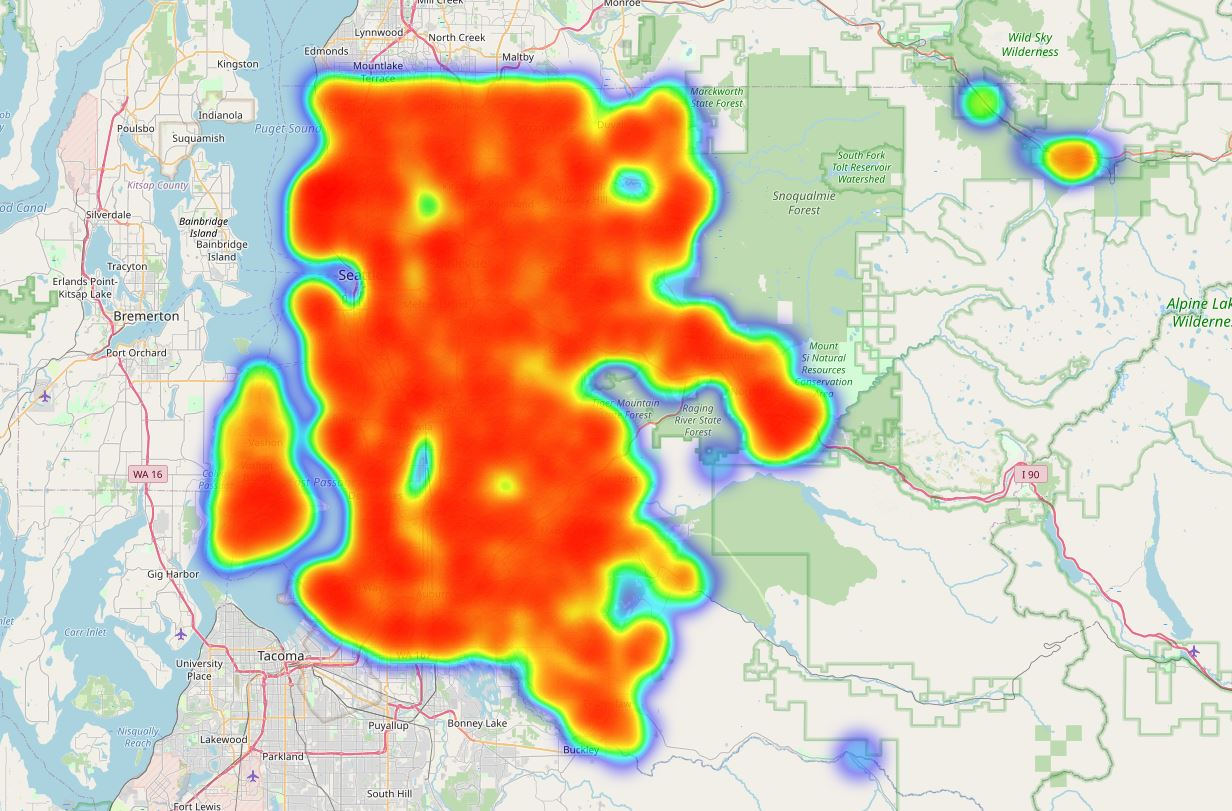



####지도도 이렇게 히트맵 형식으로도 표현이 됩니다.
####아무리 생각해도 파이썬은 정말 대단한거 같습니다.

---

#⭐아웃라이어를 없애보자



####모델을 **성능을 저하하는 요인들은 다양하게 존재**합니다.
####**그중 하나가 아웃라이어**이고 캐글에 올라온 코드들을 살펴보다
####어떤분이 **sqft_living15, sqft_lot15에서 아웃라이어가 발생한다고 했습니다**.
####실제로 확인을 해보고 어떻게 처리를 할껀지 확인해봅시다.

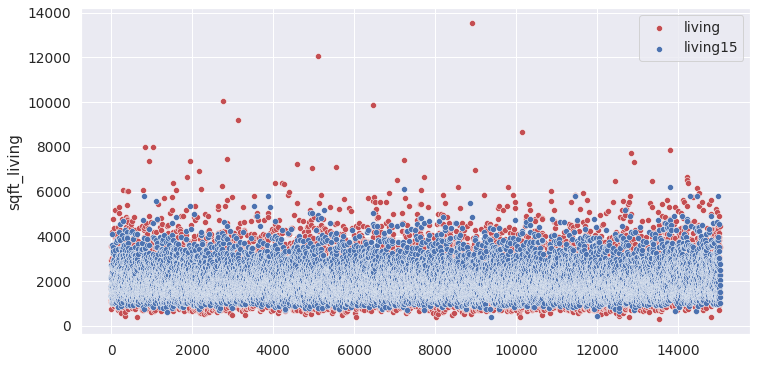

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = new_train.index, y=train['sqft_living'], color='r', label = 'living')
sns.scatterplot(x = new_train.index, y=train['sqft_living15'], color='b', label = 'living15')
plt.show()

####실제로 scatter plot을 사용해보니 바로 보입니다.
####sqft_living15 데이터는 뭔가 밀집된 느낌이 있습니다.
####그에 반해 sqft_living은 튀는 느낌이네요

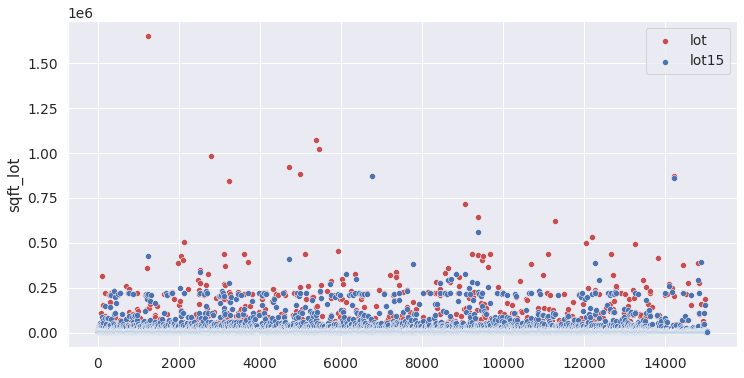

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = new_train.index, y='sqft_lot', data = train, color='r', label='lot')
sns.scatterplot(x = new_train.index, y='sqft_lot15', data = train, color='b', label='lot15')
plt.show()

####sqft_lot15도 마찬가지로 밀집되어있는 모양입니다.
####하지만 sqft_lot은 튀는 모양이네요

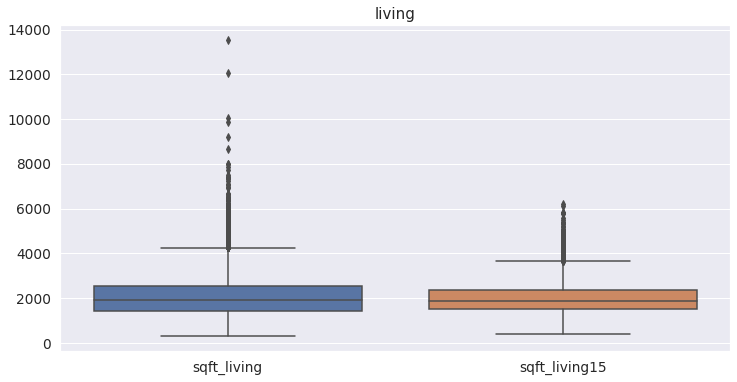

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(data = new_train[['sqft_living', 'sqft_living15']])
plt.title('living')
plt.show()

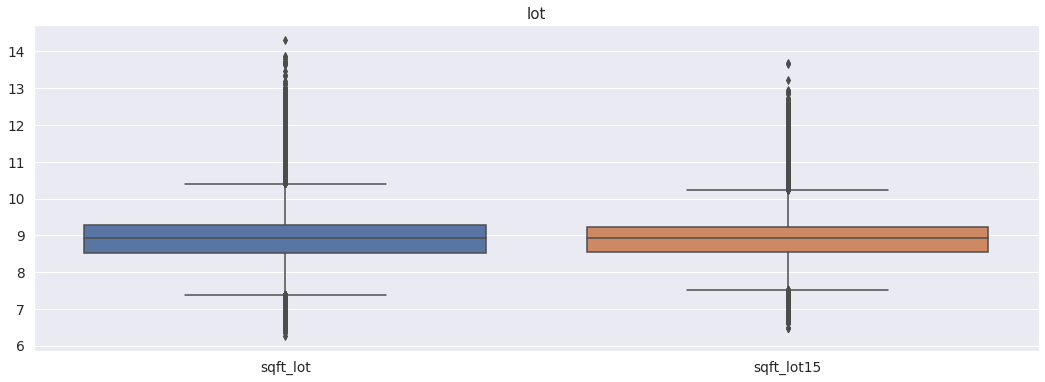

In [ ]:
plt.figure(figsize = (18,6))
sns.boxplot(data = np.log(new_train[['sqft_lot', 'sqft_lot15']]))
plt.title('lot')
plt.show()

####boxplot을 사용하니 더 잘보이는거 같습니다

---

#⭐모델 학습 및 결과출력

In [ ]:
del new_train['price']
del new_train['id']
del new_train['sqft_living']
del new_train['sqft_lot']
del new_test['id']

In [ ]:
del new_test['sqft_living']
del new_test['sqft_lot']

####위에서 발견한 아웃라이어를 발생시키는 값과
####연관성이 없는 값들을 삭제시켜줍니다.

In [ ]:
new_train['year'] = new_train['date'].apply(lambda x : x[:4]).astype(int)
new_train['month'] = new_train['date'].apply(lambda x : x[4:6]).astype(int)
new_train['day'] = new_train['date'].apply(lambda x : x[6:8]).astype(int)

new_test['year'] = new_test['date'].apply(lambda x : x[:4]).astype(int)
new_test['month'] = new_test['date'].apply(lambda x : x[4:6]).astype(int)
new_test['day'] = new_test['date'].apply(lambda x : x[6:8]).astype(int)

In [ ]:
del new_train['date']
del new_test['date']

In [ ]:
model5 = LGBMRegressor(max_depth = 20, n_estimators=300, random_state=random_state)
model5.fit(new_train, y)
prediction5 = model5.predict(new_test)
prediction5

array([13.13723292, 13.00432333, 14.05834765, ..., 13.08234391,
       12.68465512, 12.94909876])

In [ ]:
prediction5 = np.expm1(prediction5)
prediction5

array([ 507489.32008657,  444329.23036772, 1274859.92738689, ...,
        480384.36744201,  322756.04053908,  420456.53072506])

In [ ]:
model6 = XGBRegressor(learning_rate= 0.1, max_depth = 6, n_estimators = 500, random_state=random_state)
model6.fit(new_train, y)
prediction6 = model6.predict(new_test)
prediction6

[13:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([13.196025 , 13.07951  , 14.159501 , ..., 13.062144 , 12.6889105,
       12.986114 ], dtype=float32)

In [ ]:
prediction6 = np.expm1(prediction6)
prediction6

array([ 538220.2 ,  479024.8 , 1410564.2 , ...,  470778.12,  324132.4 ,
        436311.3 ], dtype=float32)

In [ ]:
en2 = np.vstack([prediction5, prediction6]).mean(0)

####**위에서 실행했을때 가장 오차율 값이 적었던 모델이 두개 있었습니다**.
####**그 모델들을 다시 그대로 앙상블하여 사용**해보겠습니다

In [ ]:
submission['price'] = en2
submission.head()

,id,price
0,15035,5.228548e+05
1,15036,4.616770e+05
2,15037,1.342712e+06
3,15038,2.801193e+05
4,15039,3.239678e+05


In [ ]:
submission.to_csv('submission2.csv', index=False)

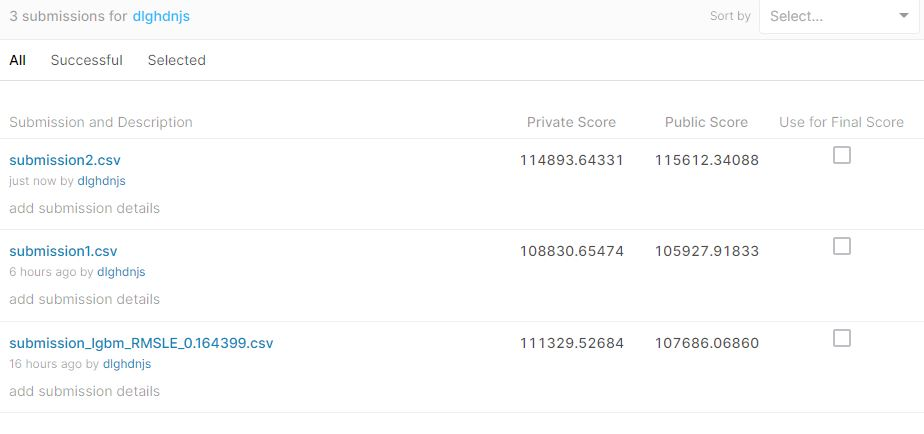

####음... 결과가 더 안좋게 나왔습니다.
####왜 그럴까요?
####아 **로그변환을 안시켰습니다**.....다시 하겠습니다.

In [ ]:
new_train1 = pd.read_csv('/content/drive/MyDrive/pic/train.csv')
new_test1 = pd.read_csv('/content/drive/MyDrive/pic/test.csv')

In [ ]:
y = new_train1['price']

del new_train1['price']
del new_train1['id']

In [ ]:
del new_test1['id']

In [ ]:
new_train1['year'] = new_train1['date'].apply(lambda x : x[:4]).astype(int)
new_train1['month'] = new_train1['date'].apply(lambda x : x[4:6]).astype(int)
new_train1['day'] = new_train1['date'].apply(lambda x : x[6:8]).astype(int)

new_test1['year'] = new_test1['date'].apply(lambda x : x[:4]).astype(int)
new_test1['month'] = new_test1['date'].apply(lambda x : x[4:6]).astype(int)
new_test1['day'] = new_test1['date'].apply(lambda x : x[6:8]).astype(int)

####기존과 비슷한 방식으로 전처리를 깔쌈하게 해줍니다.

In [ ]:
train_len1 = len(new_train1)
data1 = pd.concat((new_train1, new_test1), axis=0)

In [ ]:
del data1['date']

In [ ]:
data1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2,1.00,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
3,3,2.25,1715,6819,2.0,0,0,3,7,1715,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
4,3,1.50,1060,9711,1.0,0,0,3,7,1060,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15


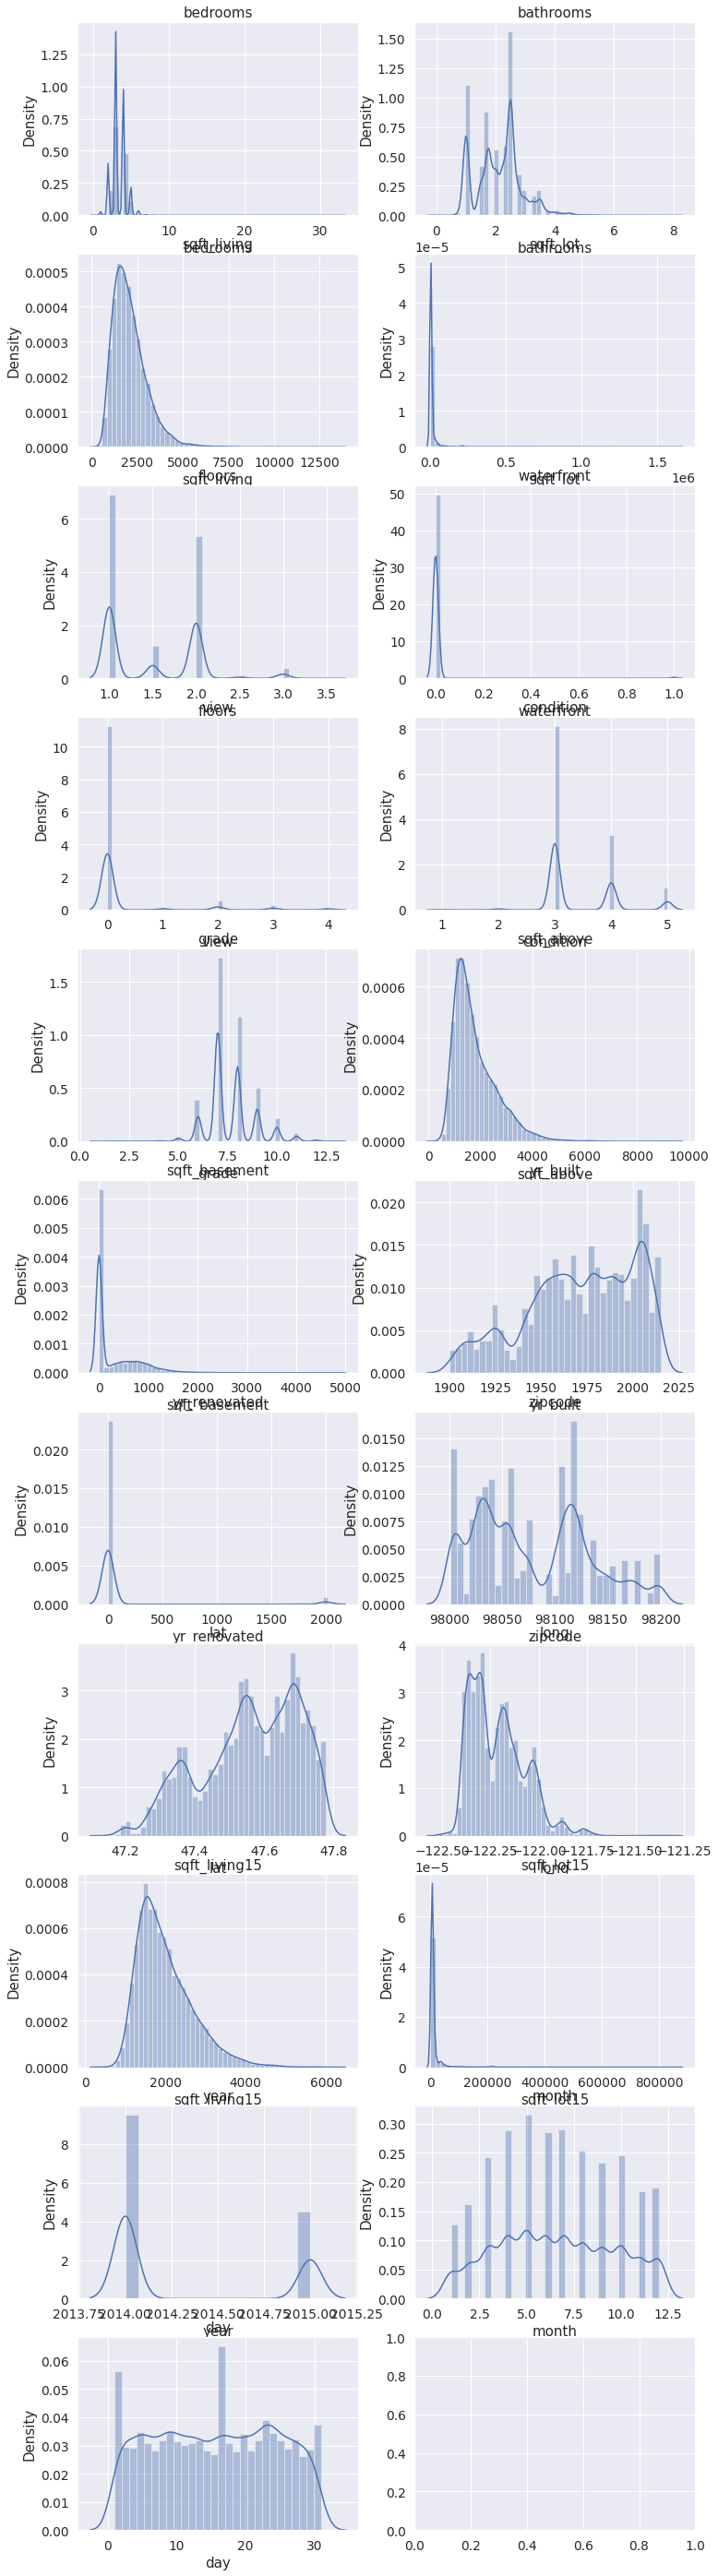

In [ ]:
fig, ax = plt.subplots(11, 2, figsize=(12, 50))   

count = 1
columns = data.columns
for row in range(11):
    for col in range(2):
        sns.distplot(data1[columns[count]], ax = ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 22 :
            break

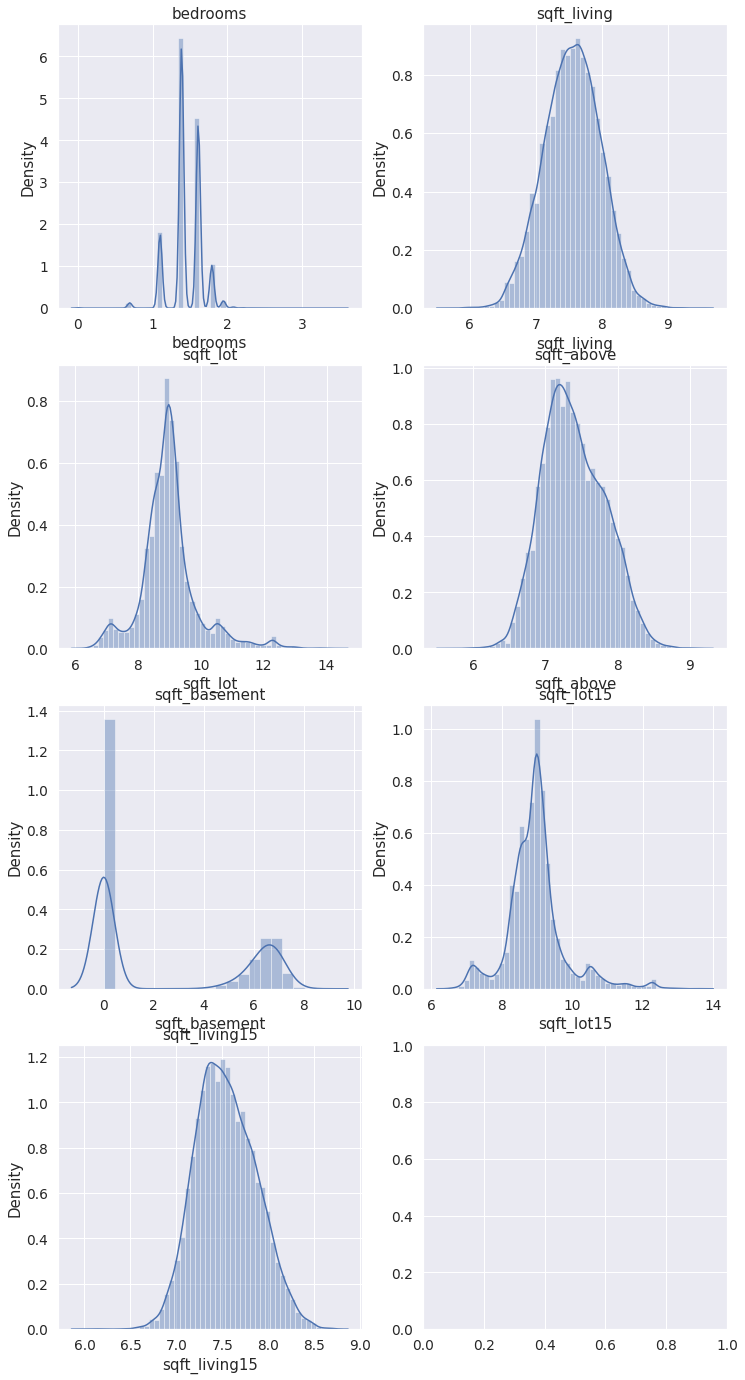

In [ ]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data1[c] = np.log1p(data1[c].values)

fig, ax = plt.subplots(4, 2, figsize=(12, 24))   

count = 0
for row in range(4):
    for col in range(2):
        if count == 7 :
            break
        sns.distplot(data1[skew_columns[count]], ax = ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

####이제는 빼먹지않고 로그함수를 사용하여 특정 값들을 고르게 펴줍니다.

In [ ]:
del data1['sqft_living']
del data1['sqft_lot']

data1.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,1.386294,1.00,1.0,0,0,3,7,7.074117,0.0,1955,0,98178,47.5112,-122.257,7.201171,8.639588,2014,10,13
1,1.098612,1.00,1.0,0,0,3,6,6.647688,0.0,1933,0,98028,47.7379,-122.233,7.908755,8.995041,2015,2,25
2,1.386294,2.00,1.0,0,0,3,8,7.427144,0.0,1987,0,98074,47.6168,-122.045,7.496097,8.923191,2015,2,18
3,1.386294,2.25,2.0,0,0,3,7,7.447751,0.0,1995,0,98003,47.3097,-122.327,7.713785,8.827615,2014,6,27
4,1.386294,1.50,1.0,0,0,3,7,6.966967,0.0,1963,0,98198,47.4095,-122.315,7.409136,9.181118,2015,1,15


In [ ]:
sub1 = data1.iloc[train_len1:, :]
x1 = data1.iloc[:train_len1, :]

print(x1.shape)
print(sub1.shape)

(15035, 19)
(6468, 19)


####다시 잘 나누어진걸 확인하실 수 있습니다.

In [ ]:
model7 = LGBMRegressor(max_depth = 20, n_estimators=300, random_state=random_state)
model7.fit(x1, y)
prediction7 = model7.predict(sub1)
prediction7

array([ 485623.31721044,  451398.7709103 , 1130717.5299285 , ...,
        469241.29045212,  333776.94846791,  433021.73169532])

####스톱 뭔가 잘못된거 같아보입니다.
####분명 로그변환전인데 값이 왜 저렇게 나올까요....
####다시한번 값을 확인하겠습니다.

In [ ]:
new_train2 = pd.read_csv('/content/drive/MyDrive/pic/train.csv')
new_test2 = pd.read_csv('/content/drive/MyDrive/pic/test.csv')

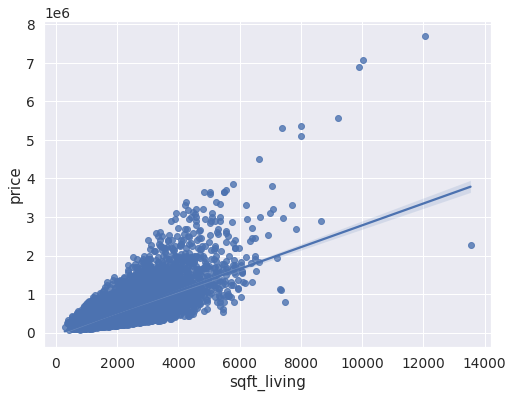

In [ ]:
data2 = pd.concat([new_train2['price'], new_train2['sqft_living']], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.regplot(x = 'sqft_living', y="price", data = data2)

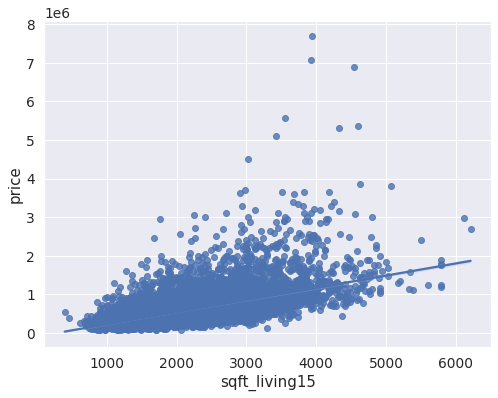

In [ ]:
data2 = pd.concat([new_train2['price'], new_train2['sqft_living15']], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.regplot(x = 'sqft_living15', y = "price", data = data2)

####문제점을 찾은거 같습니다.
####분명 아까전에는 sqft_living에 문제가 있는줄만 알았지만 
####더 **자세하게 분석해보니 sqft_living15에 문제**가 있었습니다.
####이유는 **15년도를 기준으로 잡아서 인지 가격의 분산이 너무 크게 잡힙니다**.
####따라서 **적절한 사용법은 sqft_living15 자체를 사용하기 보단 적절한 피팅을하고 사용**해야할꺼 같습니다.


---

#⭐마무리
####사실 완벽하게 끝내고 싶었지만 시간이 부족하여.. 곧 제출시간 그래서 제출을 하게 되었습니다.
####그래도 이건 마무리를 확실하게 지어 깃허브에 올리겠습니다.
####여기서 이만 각설하고 오늘 노드는 캐글데이터를 사용하여 모델을 만들고 직접 캐글에 재출하는것이었습니다.
####실제 대회를 한다고 생각하고 재미있게 진행한거 같습니다.
####다만 아쉬운점은 오류를 해결 못한것과 데이터 분석을 체계적으로 못한것입니다.
####다양하게 체계적으로 분석을 했더라면 아마 마지막처럼 모델이 망하지는 않았을겁니다.
####이번일로 인해 데이터 처리의 중요성에대해 뼈저리게 느낀거 같습니다. 또한, 적절한 하이퍼 파라미터 적용과 앙상블 만으로도 모델성능은 엄청나게 증가한다는것을 느꼈습니다.
####솔직히 맨 처음에는 노드에 올라온 코드만으로는 1100000점 이하로 안 떨어질꺼 같았습니다.
####하지만 적절한 하이퍼 파라미터값을 설정하게 되면서 그 예상이 뒤집어졌습니다.
####몇가지를 더 적어보자면 
####1.적절한 하이퍼 파라미터는 모델을 성능을 좌우한다. 하지만 그만큼 데이터가 받쳐주어야 한다고 생각한다.
####2.데이터 전처리 > 하이퍼 파라미터 설정 인거 같다.
####3. 상성이 좋은 모델이 존재하는거 같다.
####4. 데이터 전처리는 상당히 다양한 시각에서 해야한다.
####5. 데이터마다 효율이 잘나는 모델들이 따로 존재하는거 같다. 시간이 많으면 다양하게 사용하는걸 추천
####마치며, 이번노드는 시간이 많이 걸렸습니다.
####초반에 그리드 서치를 시작하고 파라미터값을 많이 넣었더니 6시간동안 실행이 안되는걸 보고 직접 최적값을 찾기도 하였습니다.
####적절한 값을 잘 넣어 마무리가 잘되었지만, 만약에 안되었다면 노드를 제출하지 못할수도 있었을겁니다.
####비슷한 노드가 또 주어지게 된다면 그때는 저도 캐글 상위권 분들처럼 하고 싶습니다.


---

참고

https://www.kaggle.com/code/reddust/feat-groupbyzipcode

https://www.kaggle.com/code/fulrose/eda-with-map-visualization


https://www.kaggle.com/code/chocozzz/house-price-prediction-eda-updated-2019-03-12/notebook